In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
# Load your data into a DataFrame
df = pd.read_csv('sample_data/late.csv')

# Display the first few rows of the dataset
df.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000e+00,2404:6800:4007:80a::200a,2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236,UDP,195,443 > 54762 Len=133
1,2,2.240000e-07,2404:6800:4007:80a::200a,2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236,UDP,112,443 > 54762 Len=50
2,3,2.737900e-04,2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236,2404:6800:4007:80a::200a,UDP,107,54762 > 443 Len=45
3,4,3.563550e-04,2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236,2404:6800:4007:80a::200a,UDP,102,54762 > 443 Len=40
4,5,5.886481e-02,2404:6800:4007:80a::200a,2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236,UDP,87,443 > 54762 Len=25


In [97]:
# Display the first few rows of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117084 entries, 0 to 117083
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   No.          117084 non-null  int64  
 1   Time         117084 non-null  float64
 2   Source       117084 non-null  object 
 3   Destination  117084 non-null  object 
 4   Protocol     117084 non-null  object 
 5   Length       117084 non-null  int64  
 6   Info         117084 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.3+ MB


In [98]:
# Get statistical summary of numerical columns
print(df.describe())

                 No.           Time         Length
count  117084.000000  117084.000000  117084.000000
mean    58542.500000    2557.265139     675.000145
std     33799.383796    1998.481859    1062.354699
min         1.000000       0.000000      42.000000
25%     29271.750000     745.480519      86.000000
50%     58542.500000    2051.053935     101.000000
75%     87813.250000    3985.455522    1292.000000
max    117084.000000    6941.356968   17838.000000


In [99]:
# Check for missing values
df.isnull().sum()

,0
No.,0
Time,0
Source,0
Destination,0
Protocol,0
Length,0
Info,0


In [100]:
# Check for duplicates
df.duplicated().sum()

0

In [101]:
# Convert 'Time' to numeric if not already
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')

In [102]:
df.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000e+00,2404:6800:4007:80a::200a,2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236,UDP,195,443 > 54762 Len=133
1,2,2.240000e-07,2404:6800:4007:80a::200a,2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236,UDP,112,443 > 54762 Len=50
2,3,2.737900e-04,2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236,2404:6800:4007:80a::200a,UDP,107,54762 > 443 Len=45
3,4,3.563550e-04,2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236,2404:6800:4007:80a::200a,UDP,102,54762 > 443 Len=40
4,5,5.886481e-02,2404:6800:4007:80a::200a,2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236,UDP,87,443 > 54762 Len=25


In [103]:
# Distribution of packet lengths
df['Length'].describe()

,Length
count,117084.000000
mean,675.000145
std,1062.354699
min,42.000000
25%,86.000000
50%,101.000000
75%,1292.000000
max,17838.000000


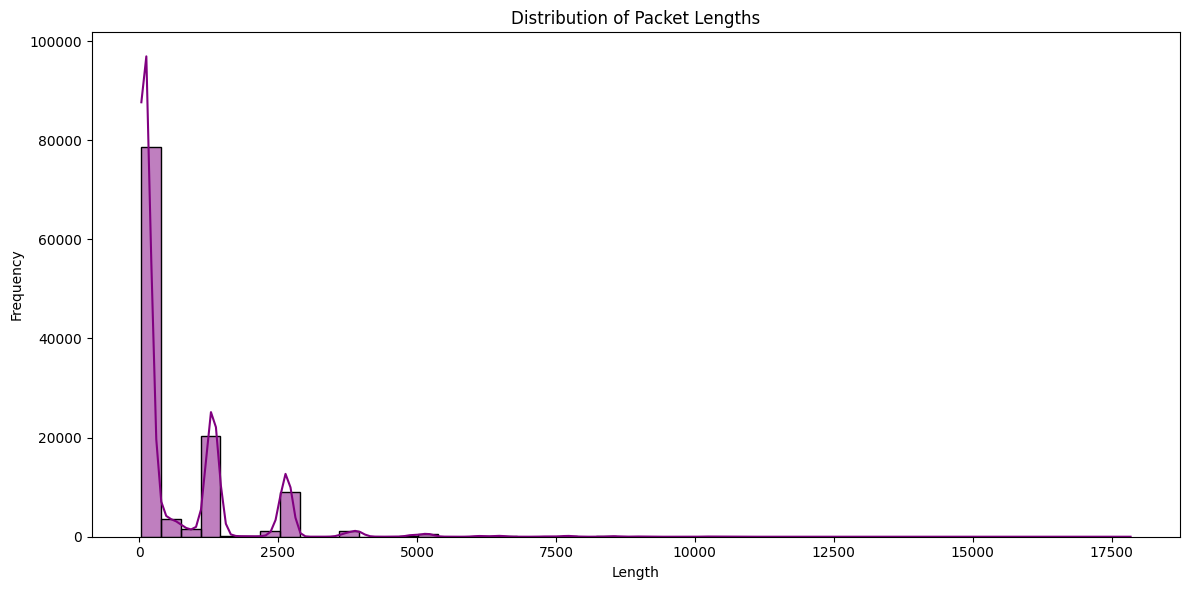

In [104]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Length'], bins=50, kde=True, color='purple')
plt.title('Distribution of Packet Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Protocol
TCP        51036
QUIC       41762
TLSv1.3    12450
TLSv1.2     3756
DNS         3128
UDP         2692
ICMPv6       865
ARP          514
MDNS         412
SSDP         298
HTTP         109
ICMP          20
TLSv1         12
DHCP          11
NTP            8
SSLv2          6
IGMPv3         4
R-GOOSE        1
Name: count, dtype: int64


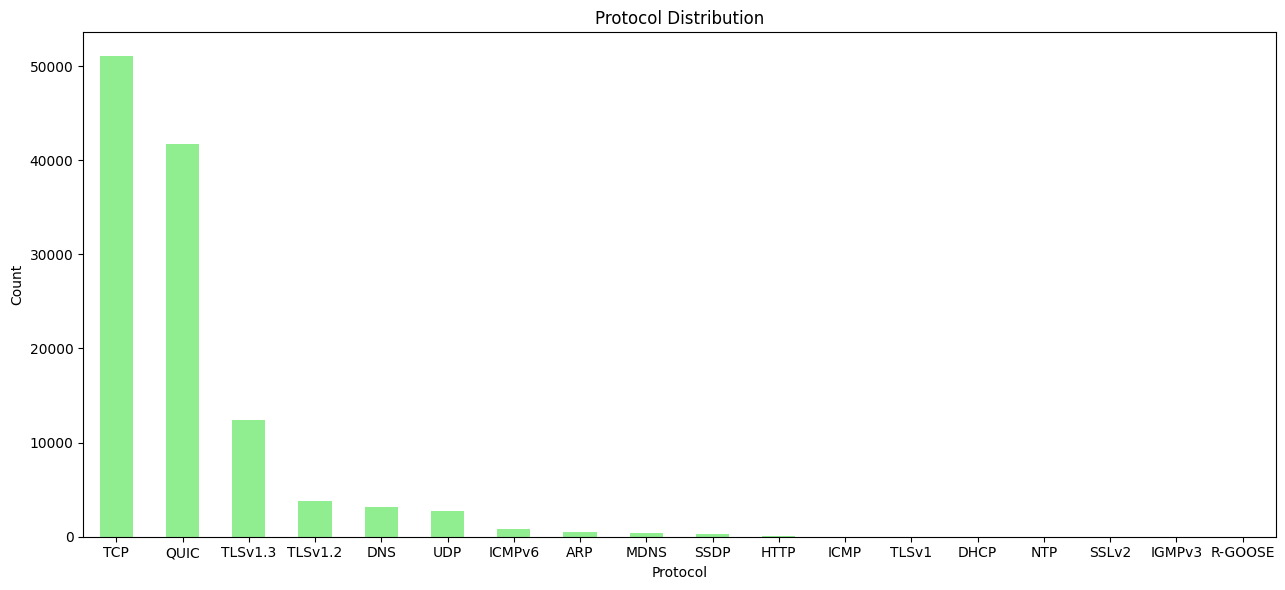

In [105]:
# Count of each protocol
print(df['Protocol'].value_counts())

protocol_counts = df['Protocol'].value_counts()
plt.figure(figsize=(13, 6))
protocol_counts.plot(kind='bar', color='lightgreen')
plt.title('Protocol Distribution')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Source
2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236    49902
2600:1901:1:c36::                          10065
2405:200:1630:a03::312c:c5c8                6536
64:ff9b::b97d:be1b                          4301
192.168.239.25                              3219
Name: count, dtype: int64


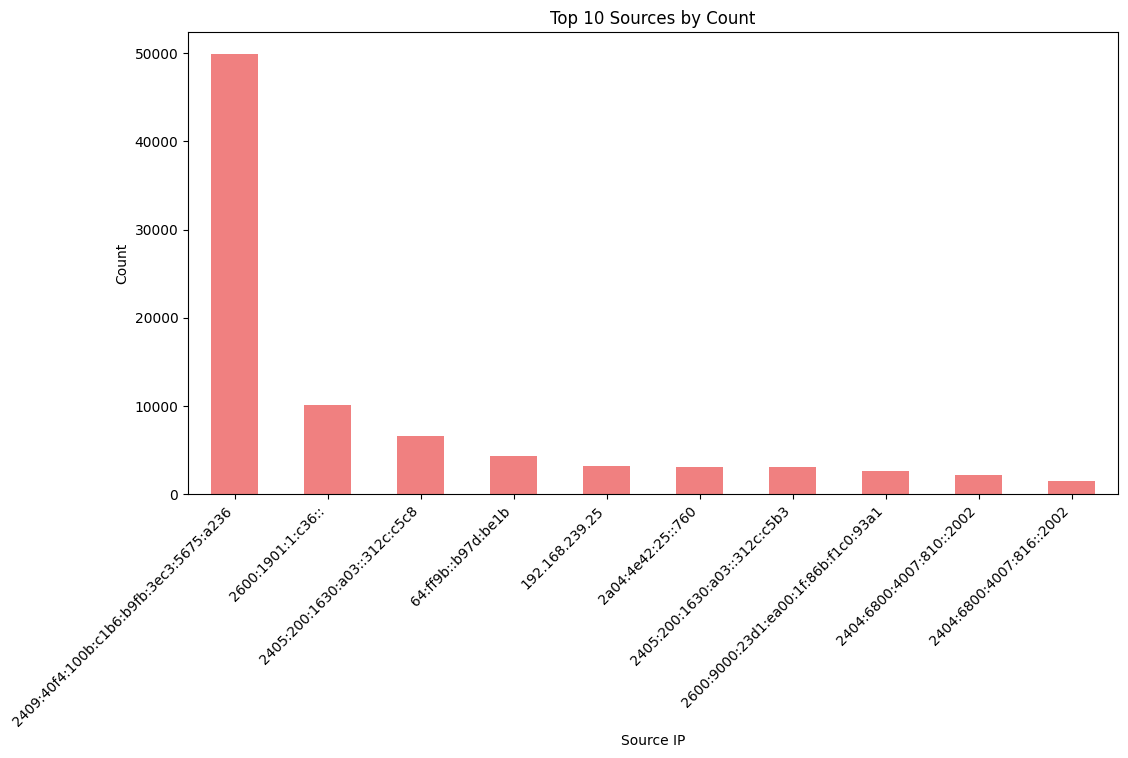

In [106]:
# Count of each source and destination IP
print(df['Source'].value_counts().head())

top_sources = df['Source'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_sources.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Sources by Count')
plt.xlabel('Source IP')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Destination
2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236    60423
2600:1901:1:c36::                           8550
2405:200:1630:a03::312c:c5c8                5184
64:ff9b::b97d:be1b                          3106
2a04:4e42:25::760                           2528
Name: count, dtype: int64


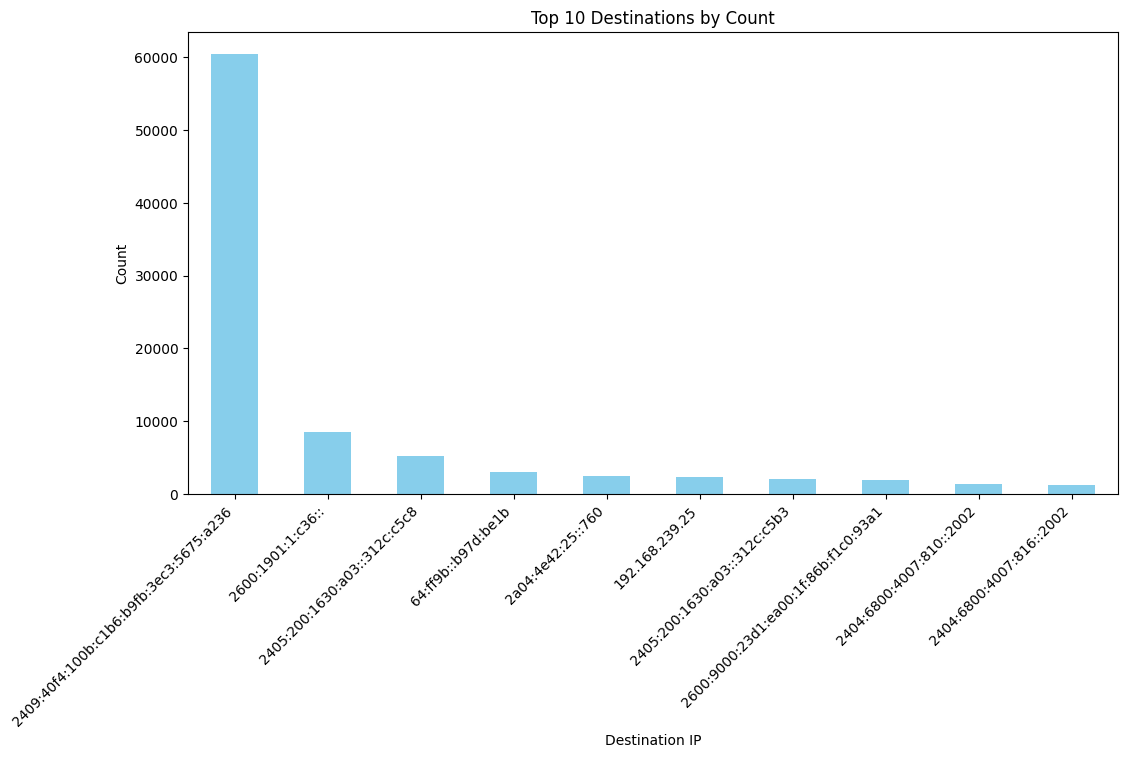

In [107]:
print(df['Destination'].value_counts().head())

top_destinations = df['Destination'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_destinations.plot(kind='bar', color='skyblue')
plt.title('Top 10 Destinations by Count')
plt.xlabel('Destination IP')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

count                           117084
mean     1970-01-01 00:42:37.265139175
min                1970-01-01 00:00:00
25%      1970-01-01 00:12:25.480519163
50%      1970-01-01 00:34:11.053934943
75%      1970-01-01 01:06:25.455521802
max      1970-01-01 01:55:41.356967959
Name: Time, dtype: object


<Axes: >

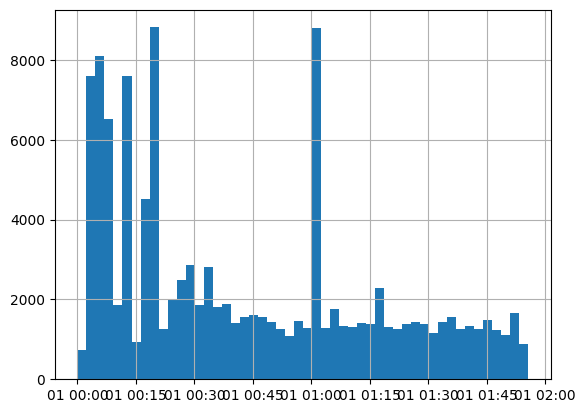

In [108]:
# Distribution of packets over time
df['Time'] = pd.to_datetime(df['Time'], unit='s')  # Adjust this if your time is not in seconds
print(df['Time'].describe())

# Plot packet count over time
df['Time'].hist(bins=50)

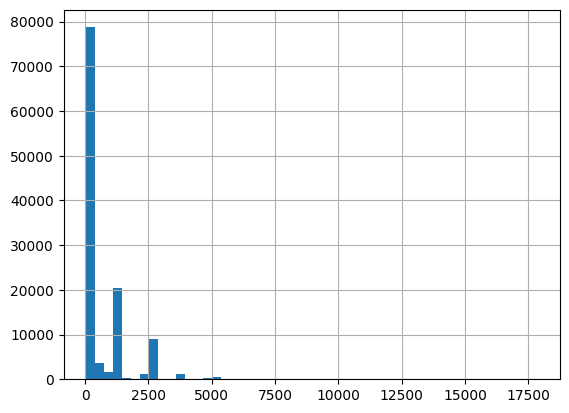

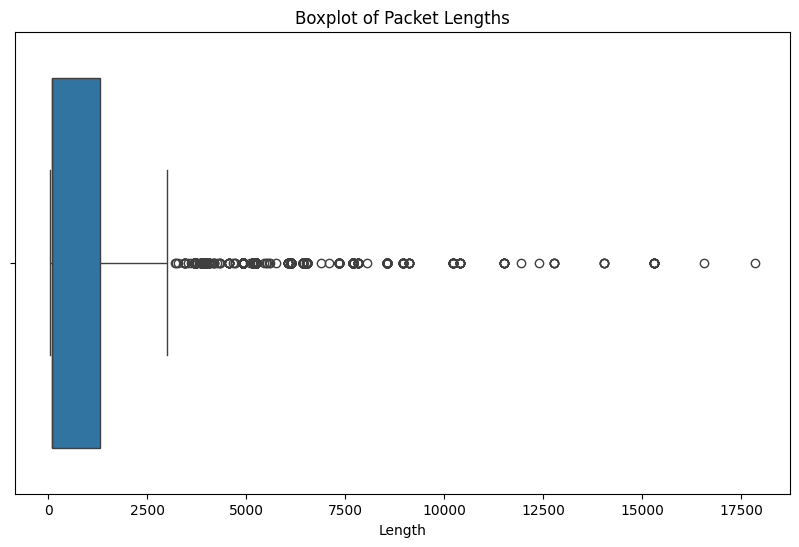

In [109]:
# Histogram of packet lengths
df['Length'].hist(bins=50)

# Boxplot of packet lengths
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Length'])
plt.title('Boxplot of Packet Lengths')
plt.show()


            Source      Destination  Count
0          0.0.0.0  255.255.255.255      3
1  104.199.240.237   192.168.239.25    152
2   104.46.162.226   192.168.239.25     13
3      13.107.5.93   192.168.239.25    374
4        13.67.9.5   192.168.239.25      1


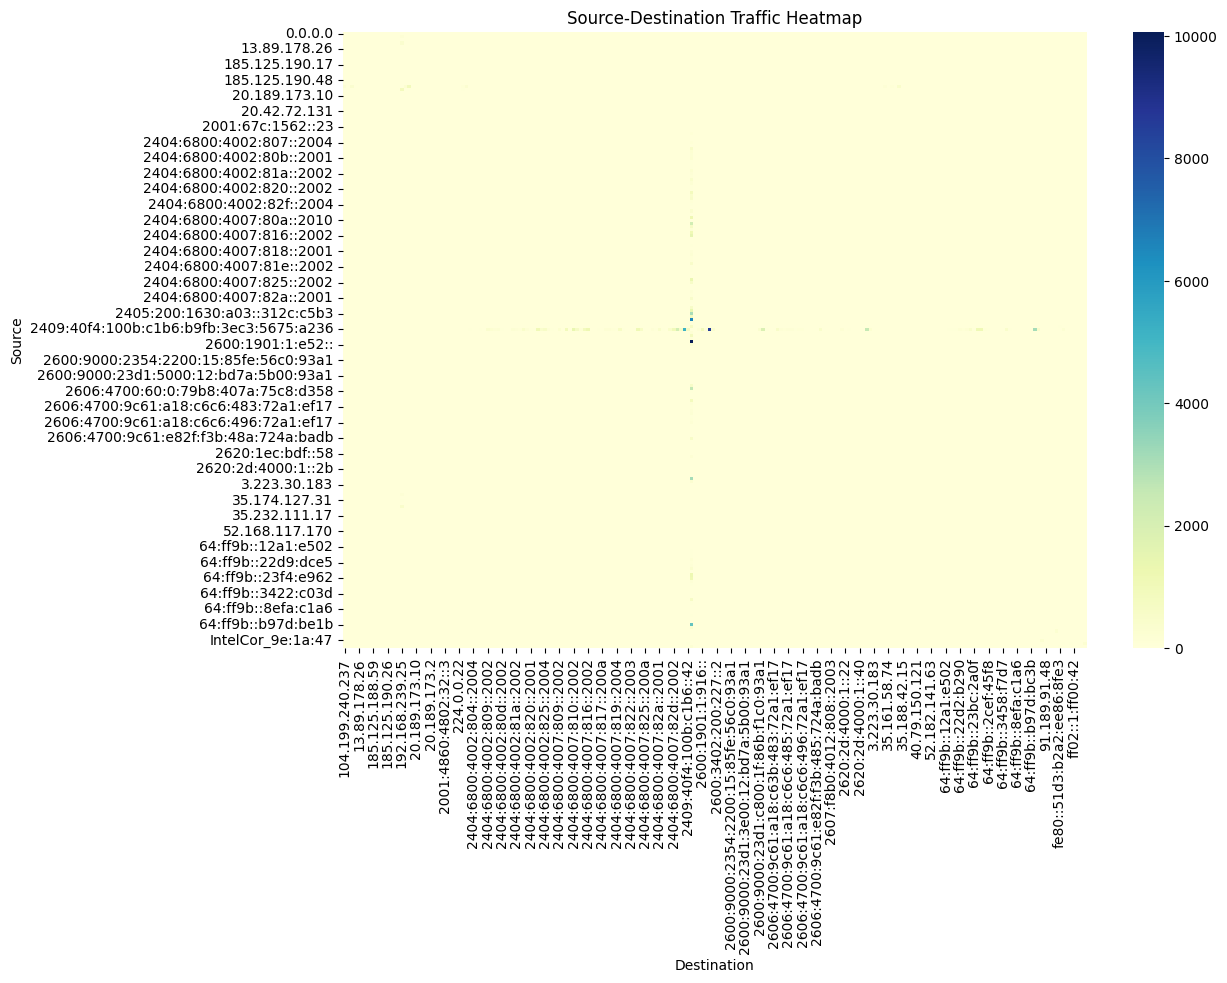

In [110]:
# Count of traffic between source and destination IPs
source_dest_counts = df.groupby(['Source', 'Destination']).size().reset_index(name='Count')
print(source_dest_counts.head())

# Optionally create a heatmap of source-destination pairs
import seaborn as sns

heatmap_data = df.pivot_table(index='Source', columns='Destination', values='Length', aggfunc='count', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False)
plt.title('Source-Destination Traffic Heatmap')
plt.show()